In [1]:
import keras
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
#setting the dimensions
img_width, img_height = 288, 432

#directories with the data
train_data_dir = "./spec_data/train"
val_data_dir = "./spec_data/val"


#some model params
num_val_data = 95
num_train_data = 373
epochs = 100 
batch_size = 32

#input shape for the model layer 0
input_shape = (img_width, img_height, 3)

In [3]:
datagen = ImageDataGenerator(
                             shear_range = 0.2, 
                             zoom_range = 0.1, 
                             horizontal_flip=False, 
                             fill_mode = 'nearest')

In [4]:
#Here it is as channel_last so we have W x H x RGB
K.image_data_format()

'channels_last'

In [5]:
#ConvNet
#input layer
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#first hidden layer 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#second hidden layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#output layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 286, 430, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 286, 430, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 143, 215, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 141, 213, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 141, 213, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 70, 106, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 68, 104, 64)       1

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
#Setting the generators 
train_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.05, horizontal_flip=False)

test_gen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_gen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_gen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 373 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


In [11]:
model_conv = model.fit(train_generator,
                        steps_per_epoch=num_train_data // batch_size,
                        epochs=epochs,
                        validation_data=validation_generator,
                        validation_steps=num_val_data // batch_size)

Epoch 1/100
11/11 [==============================] - 50s 5s/step - loss: 0.6266 - accuracy: 0.8387 - val_loss: 0.2580 - val_accuracy: 0.9219
Epoch 2/100
11/11 [==============================] - 48s 4s/step - loss: 0.4038 - accuracy: 0.9179 - val_loss: 0.2546 - val_accuracy: 0.9219
Epoch 3/100
11/11 [==============================] - 47s 4s/step - loss: 0.2833 - accuracy: 0.9208 - val_loss: 0.3291 - val_accuracy: 0.9062
Epoch 4/100
11/11 [==============================] - 51s 5s/step - loss: 0.5357 - accuracy: 0.9355 - val_loss: 0.2452 - val_accuracy: 0.9531
Epoch 5/100
11/11 [==============================] - 48s 4s/step - loss: 0.3164 - accuracy: 0.9179 - val_loss: 0.2366 - val_accuracy: 0.9219
Epoch 6/100
11/11 [==============================] - 60s 5s/step - loss: 0.2482 - accuracy: 0.9179 - val_loss: 0.3174 - val_accuracy: 0.8906
Epoch 7/100
11/11 [==============================] - 62s 6s/step - loss: 0.2662 - accuracy: 0.9150 - val_loss: 0.3008 - val_accuracy: 0.9219
Epoch 8/100
1

Epoch 59/100
11/11 [==============================] - 47s 4s/step - loss: 0.0480 - accuracy: 0.9765 - val_loss: 0.4863 - val_accuracy: 0.9062
Epoch 60/100
11/11 [==============================] - 47s 4s/step - loss: 0.0495 - accuracy: 0.9824 - val_loss: 0.6757 - val_accuracy: 0.9062
Epoch 61/100
11/11 [==============================] - 47s 4s/step - loss: 0.0657 - accuracy: 0.9677 - val_loss: 0.8944 - val_accuracy: 0.9531
Epoch 62/100
11/11 [==============================] - 47s 4s/step - loss: 0.0398 - accuracy: 0.9853 - val_loss: 0.6181 - val_accuracy: 0.9219
Epoch 63/100
11/11 [==============================] - 47s 4s/step - loss: 0.0228 - accuracy: 0.9853 - val_loss: 1.1136 - val_accuracy: 0.9375
Epoch 64/100
11/11 [==============================] - 47s 4s/step - loss: 0.0377 - accuracy: 0.9853 - val_loss: 0.7204 - val_accuracy: 0.9219
Epoch 65/100
11/11 [==============================] - 47s 4s/step - loss: 0.0423 - accuracy: 0.9941 - val_loss: 0.6991 - val_accuracy: 0.9531
Epoch 

In [23]:
def plot_metrics(model_conv):
    range_list = list(range(epochs))
    for idx, m in enumerate(model_conv.history.keys()):
        plt.figure(figsize=(20,5), dpi=180)
        plt.plot(range_list, model_conv.history[m])
        plt.title(f"{m.upper()} for {epochs} Epochs using convnet")
        plt.xlabel("Epochs")
        plt.ylabel(f"{m.upper()}")
        plt.savefig(f"./img/Fig{idx+7}_{m.upper()}_ConvNet")

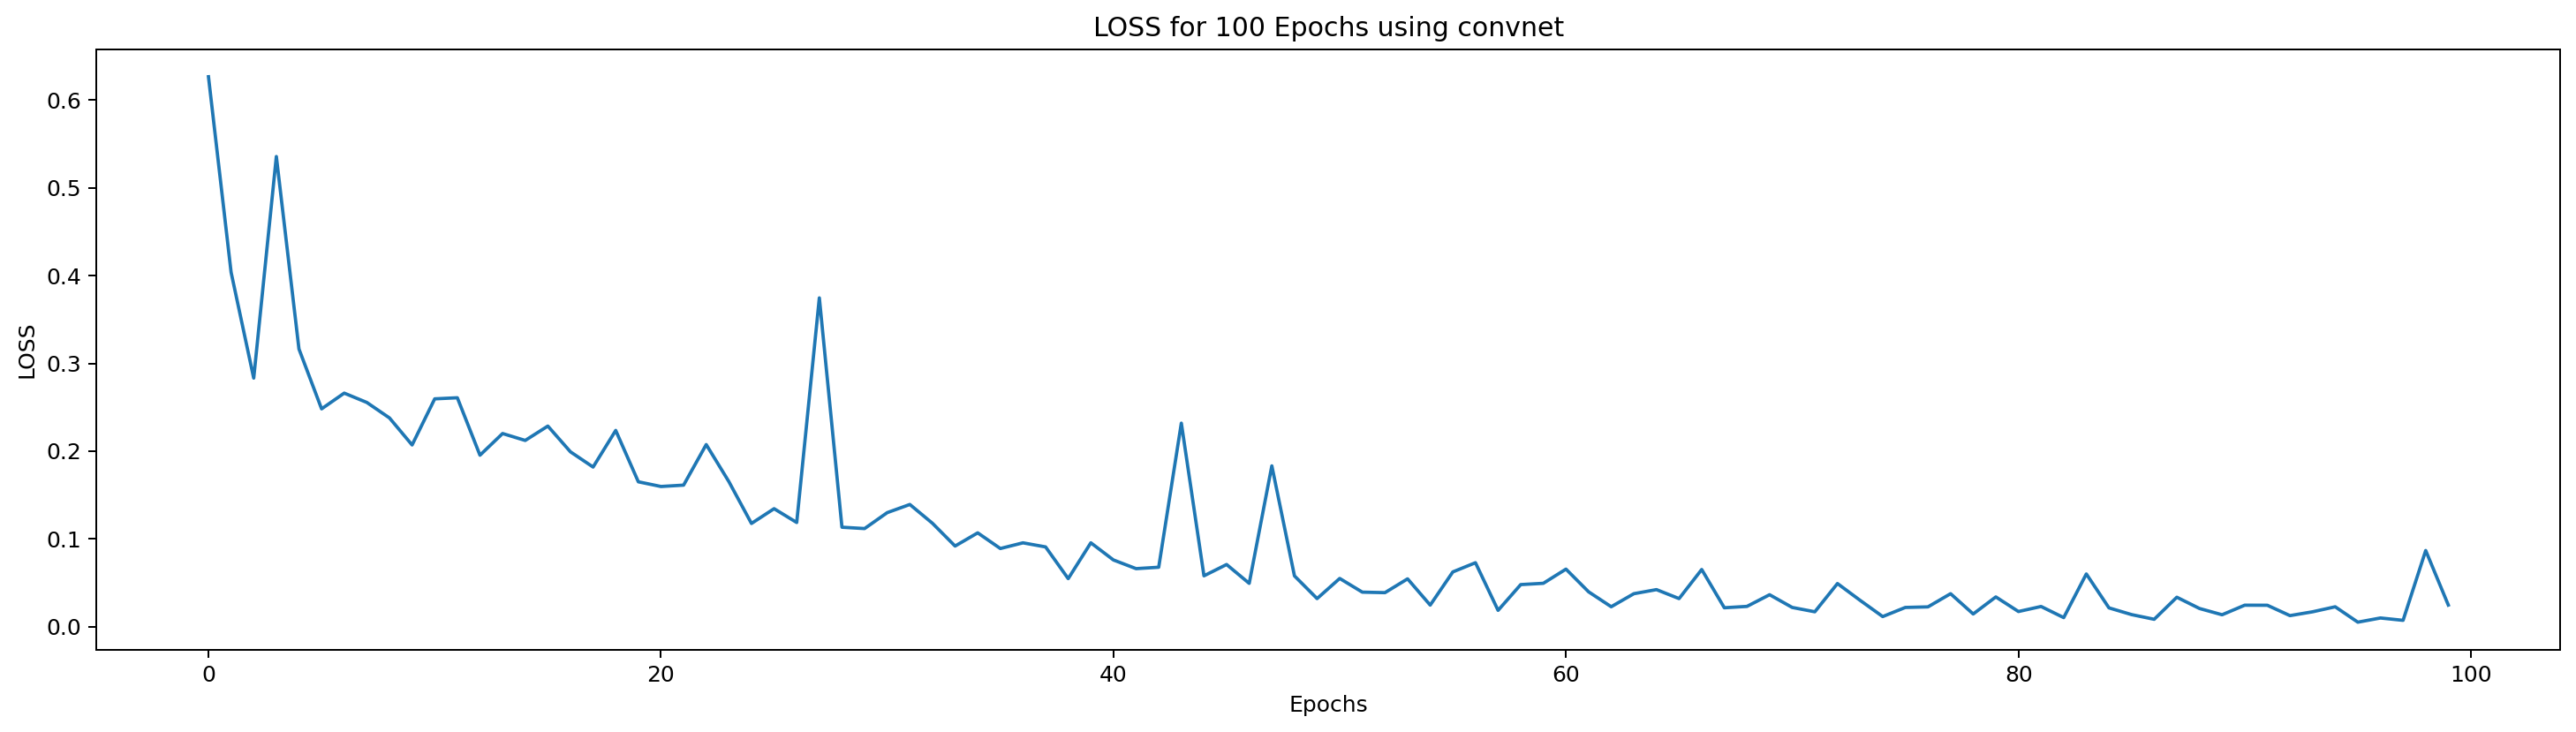

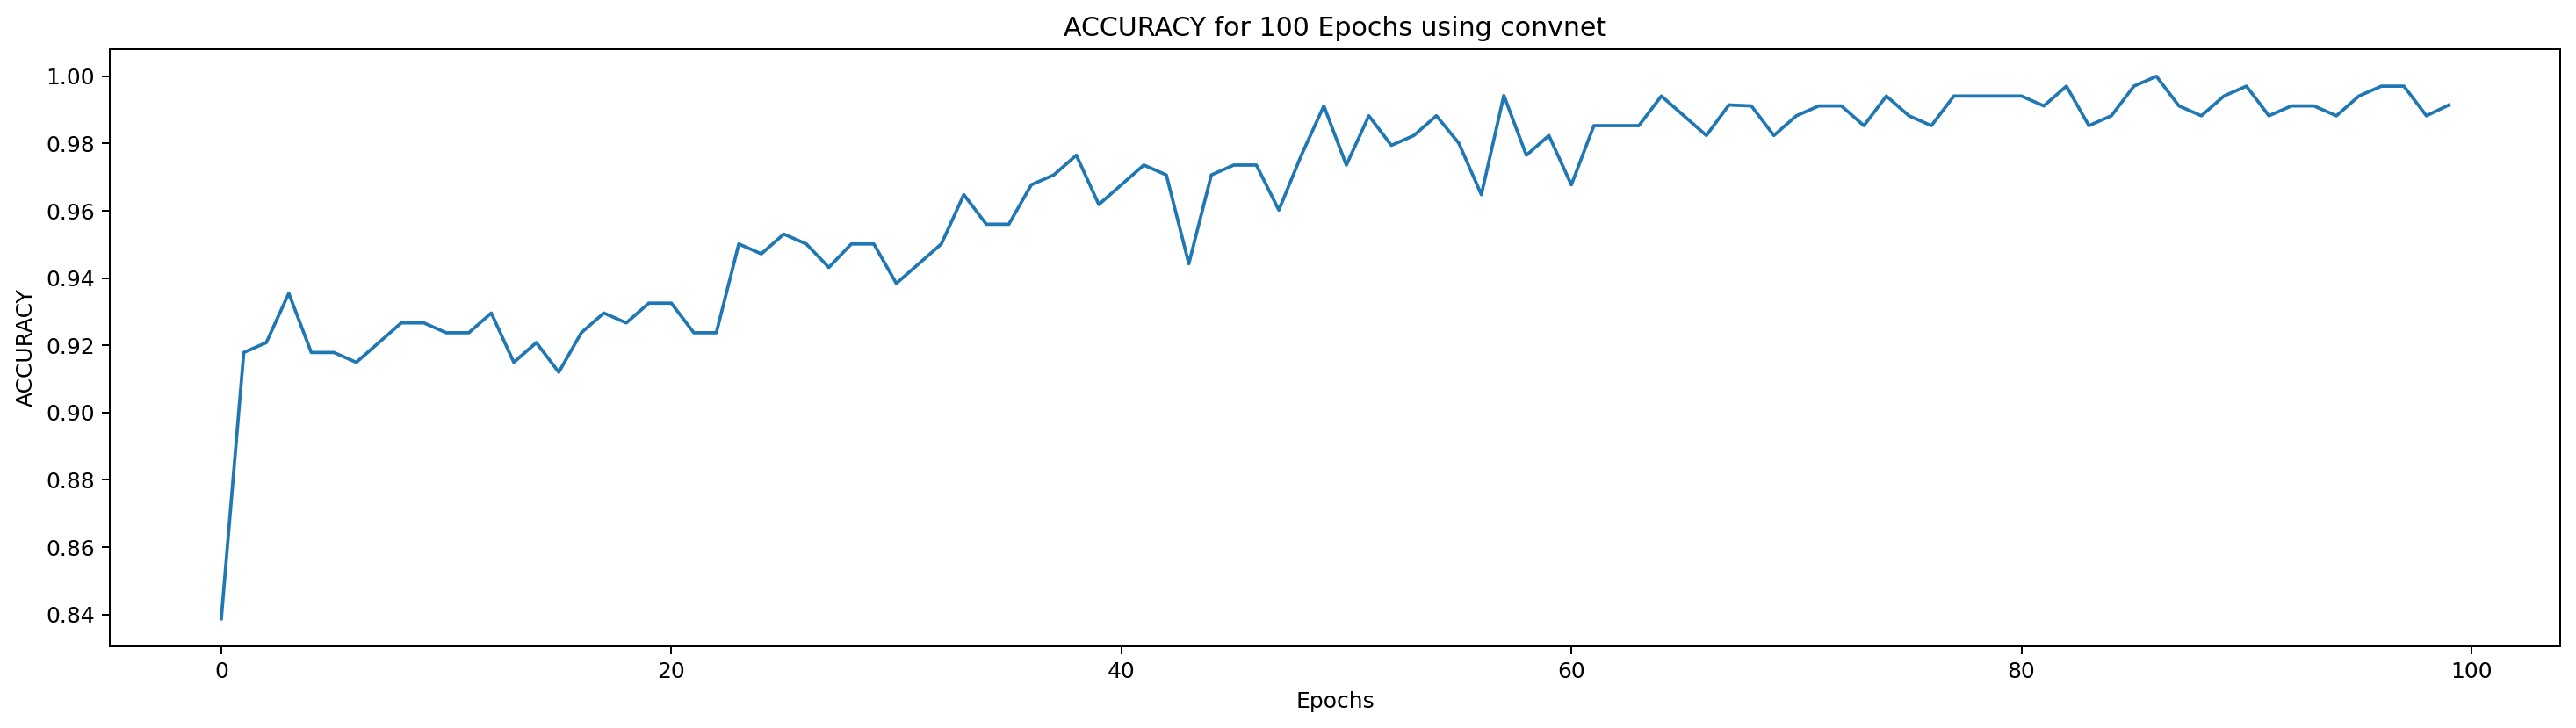

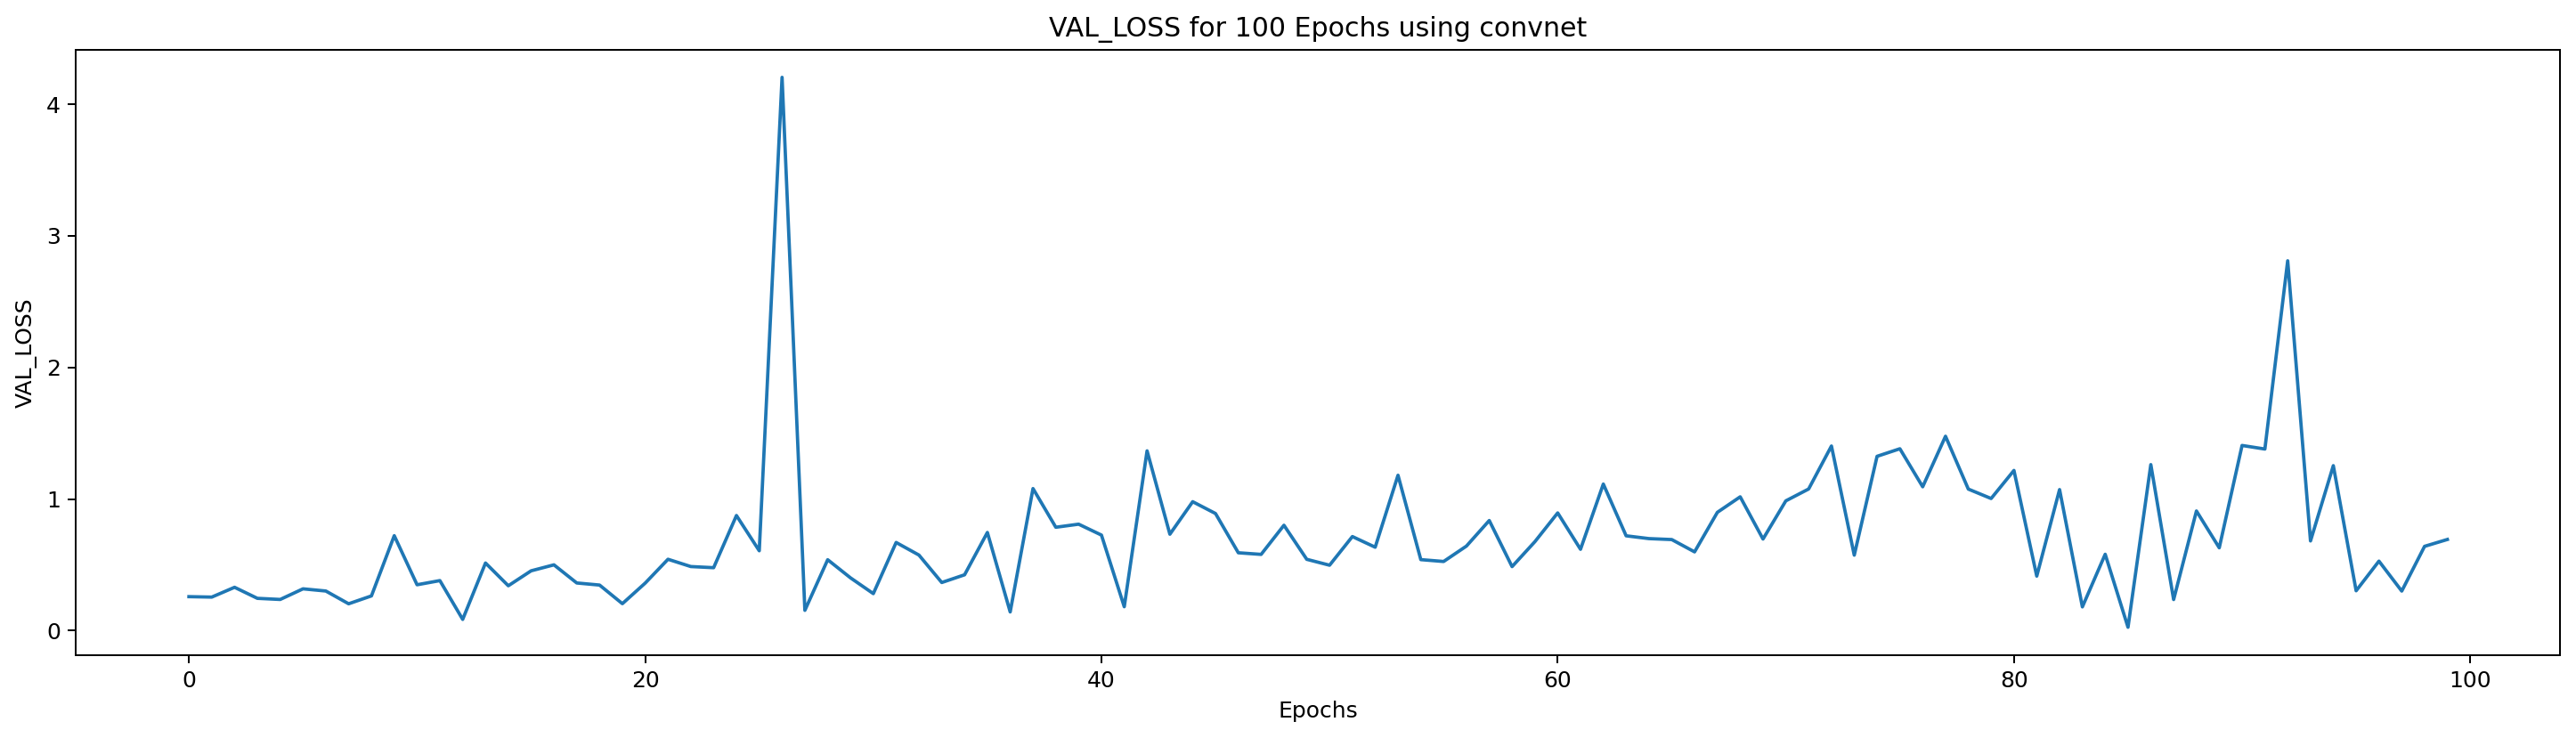

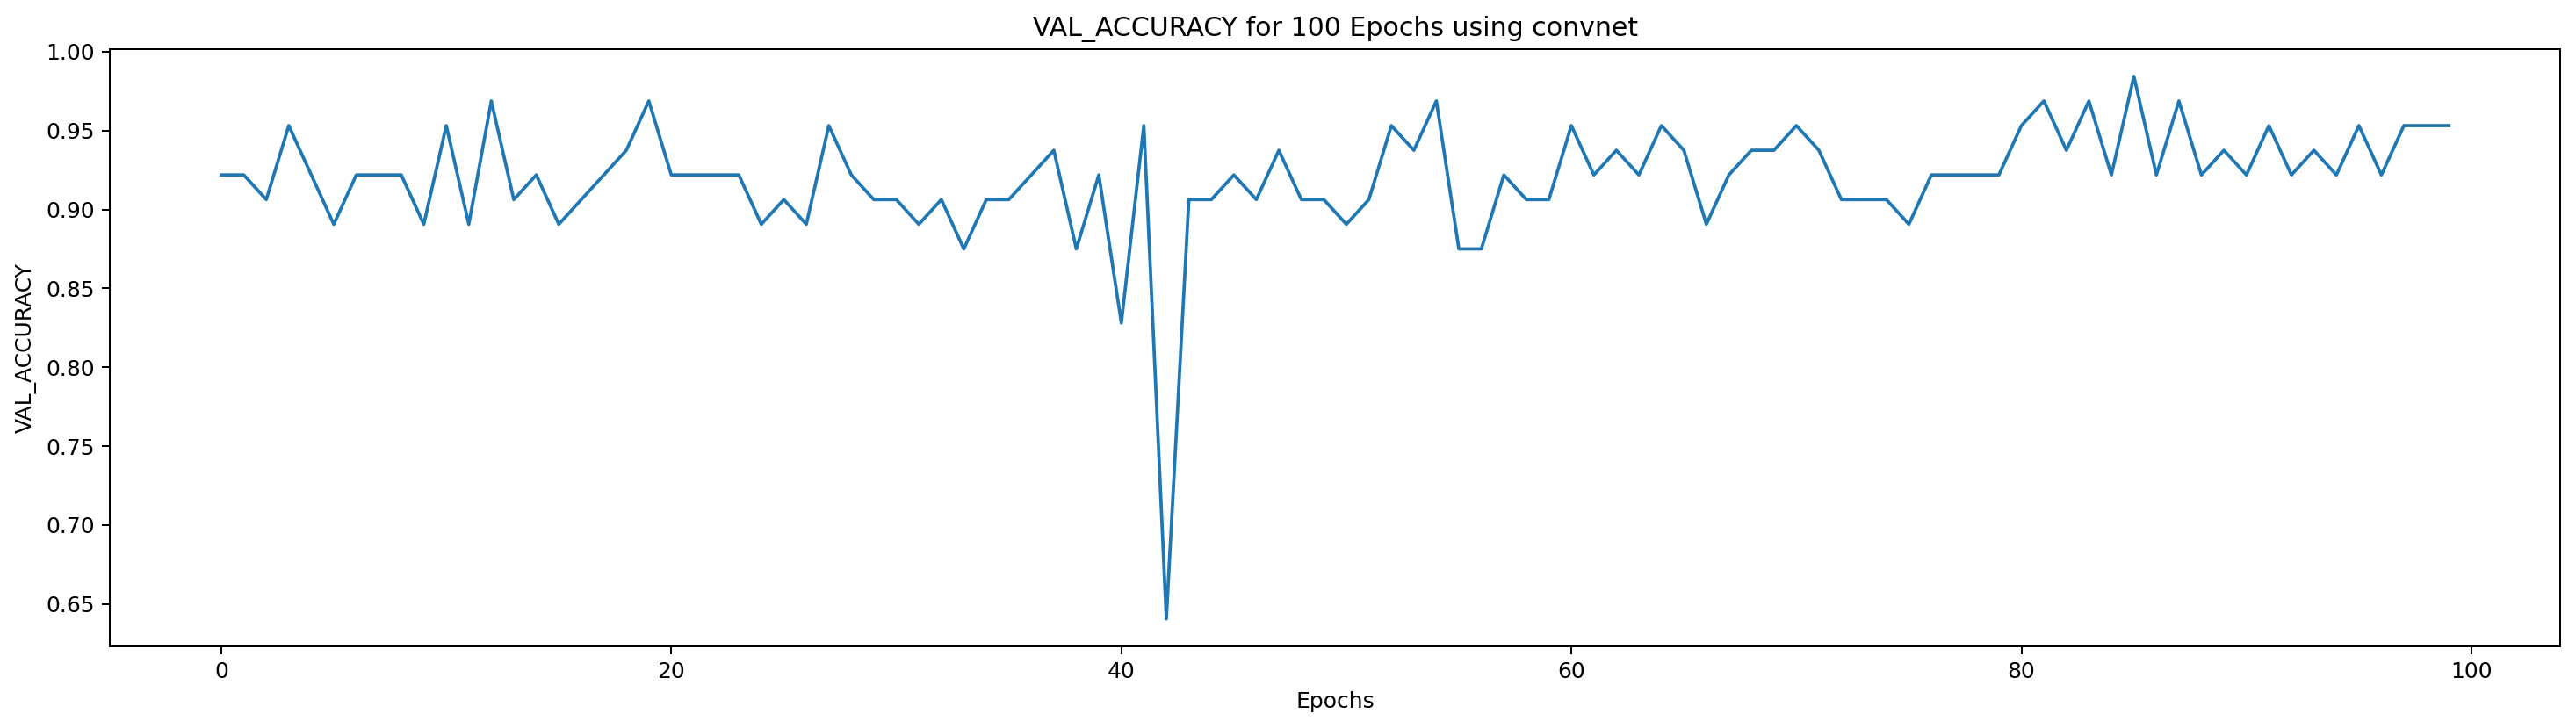

In [24]:
plot_metrics(model_conv)

In [ ]:
model.save('covid_cough_model.h5') 